# Playing With Pandas II

In this module, we will explore some more functionalities of Pandas and also introduce `seaborn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Concat and Merging

### Concat

In [ ]:
df1 = pd.DataFrame({'Name': ['Harry', 'Hari'], 'Age': [20, 24]})
df1

In [ ]:
df2 = pd.DataFrame({'Name': ['Ace', 'Chris'], 'Age': [26, 27]})
df2

In [ ]:
pd.concat([df1, df2])

### Exercise 1:

Concat `df1` and `df3` horizontally. (Set axis).

In [ ]:
df3 = pd.DataFrame({'Nationality': ['English', 'Nepalese']})

### Merge

In [ ]:
countries = pd.read_csv('../data/football/Country.csv')
countries.head()

In [ ]:
leagues = pd.read_csv('../data/football/League.csv')
leagues.head()

In [ ]:
pd.merge(countries, leagues, how='inner', left_on='id', right_on='country_id')

### Exercise 2

Import and merge `Player.csv` and `Player_Attributes.csv`.

Find the right column to merge on. 

In [ ]:
# Code Here
#players = ...
#p_attributes = ...

## Grouping

In [ ]:
df = pd.DataFrame({'Name': ['Harry', 'Hari', 'Peter', 'Sita'], 
                   'Height': [170, 160, 180, 165],
                   'Nationality': ['English', 'Nepalese', 'English', 'Nepalese']})
df

In [ ]:
df.groupby('Nationality')['Height'].mean()

### Exercise 3

Group the players by `preferred_foot` and find mean `height` and `weight`.

In [ ]:
# Code Here

Extra: Group players by birth year (Extract year from birth-date) and find mean `height` and `weight` by that.

### Exercise 4

Find a way to merge teams (`Team.csv`) and countries (`Country.csv`). 

(Note: Search in other csvs).

## Free Explorations

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [2]:
import seaborn as sns

In [3]:
sns.__version__

'0.9.0'

### Exercise 5

Scatterplot `height` and `weight` of players. See `lmplot`.

In [4]:
players = pd.read_csv('../data/football/Player.csv')

In [5]:
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
sdf = pd.DataFrame({'A': [2, 6, 7], 'B': [8,5,3]})

In [9]:
sdf

,A,B
0,2,8
1,6,5
2,7,3


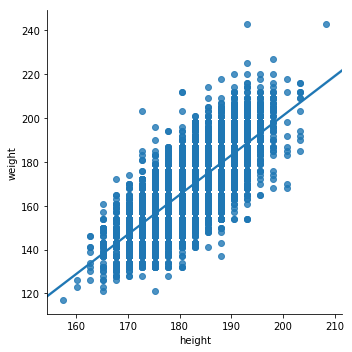

In [13]:
sns.lmplot(x='height', y='weight', data=players)

In [ ]:
#Code Here

### Exercise 6

Find team name length by country. 

Extra: `violinplot` it.

In [14]:
teams = pd.read_csv('../data/football/Team.csv')
countries = pd.read_csv('../data/football/Country.csv')
matches = pd.read_csv('../data/football/Match.csv')

In [15]:
team_match = pd.merge(teams, matches, how='inner',
                      left_on='team_api_id',
                     right_on='home_team_api_id')

In [25]:
team_countries = pd.merge(team_match, countries, how='inner',
                          left_on='country_id',
                         right_on='id')

In [27]:
team_countries = team_countries.groupby(['team_long_name', 'name'], as_index=False).first()

In [28]:
team_countries = team_countries[['team_long_name', 'name']]

In [29]:
team_countries.head()

,team_long_name,name
0,1. FC Köln,Germany
1,1. FSV Mainz 05,Germany
2,ADO Den Haag,Netherlands
3,AS Monaco,France
4,AS Saint-Étienne,France


In [30]:
edf = pd.DataFrame({'A': [1, 2]})

In [31]:
edf

,A
0,1
1,2


In [34]:
edf['A_double'] = edf['A'].map(double)

0    2
1    4
Name: A, dtype: int64

In [37]:
# team_long_name length??
team_countries['team_name_length'] = team_countries['team_long_name'].map(len)

In [38]:
team_countries.head()

,team_long_name,name,team_name_length
0,1. FC Köln,Germany,10
1,1. FSV Mainz 05,Germany,15
2,ADO Den Haag,Netherlands,12
3,AS Monaco,France,9
4,AS Saint-Étienne,France,16


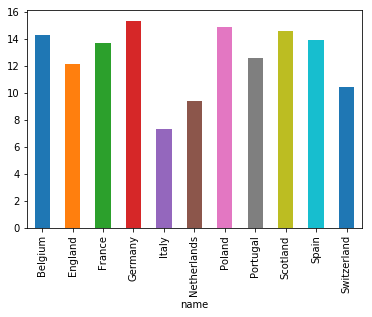

In [40]:
team_countries.groupby('name')['team_name_length'].mean().plot.bar()

In [ ]:
#Code Here

### Exercise 7

Q. Which league is the most high-scoring?

In [ ]:
league1 => [5, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1] = 1... mean
league2 => [4, 3, 3, 2] = 3 mean

In [ ]:
League High scoring?
-> Match score sum high
-> Match score high? 
-> Match score
-> Match score = total goals scored in a match
3-2 => 5
5-0 => 5

Steps
1. Compute new column total_goals which is away + home
2. Sum goals for each match grouped by league

In [42]:
league_matches = matches[['home_team_goal', 'away_team_goal', 'league_id']]

In [43]:
league_matches.head()

,home_team_goal,away_team_goal,league_id
0,2,1,1
1,2,1,1
2,3,1,1
3,3,1,1
4,3,1,1


In [51]:
b = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

In [52]:
b

,A,B
0,1,4
1,2,5
2,3,6


In [58]:
c = b[['A']].copy()

In [59]:
c

,A
0,1
1,2
2,3


In [60]:
c['A'] = 100

In [50]:
league_matches['total_goals'] = league_matches['home_team_goal'] + league_matches['away_team_goal']

/home/yokai/anaconda3/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
league_matches.head()

,home_team_goal,away_team_goal,league_id,total_goals
0,2,1,1,3
1,2,1,1,3
2,3,1,1,4
3,3,1,1,4
4,3,1,1,4


In [64]:
league_means = league_matches.groupby('league_id', as_index=False)[['total_goals']].mean()

In [65]:
league_means

,league_id,total_goals
0,1,2.891667
1,1729,2.700000
2,4769,2.526316
3,7809,2.830065
4,10257,2.576316
5,13274,2.980392
6,15722,2.645833
7,17642,2.715686
8,19694,2.850877
9,21518,2.744737


In [67]:
leagues = pd.read_csv('../data/football/League.csv')

In [68]:
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [73]:
league_finals = pd.merge(leagues, league_means, how='inner', left_on='id', right_on='league_id')

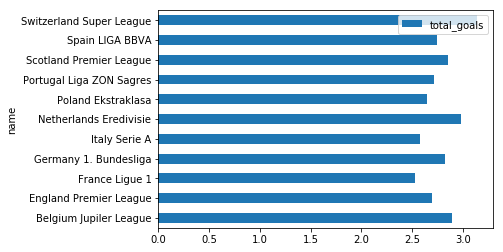

In [76]:
league_finals[['name', 'total_goals']].set_index('name').plot.barh()

### Exercise 8

Q. Which league is the most one-sided?

In [ ]:
#Code Here

### Exercise 9

Q1. What is the distribution of team names by first letters? 

In [ ]:
#Code Here

Q2. Remove 'FC's from names.

In [ ]:
#Code Here

Q3. Generate first letter vs country `heatmap`.

Hint: Use `pivot`.

In [ ]:
#Code Here

## Resources

* [Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial)
* [Choosing the right chart: suggestions](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)
